<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')
   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

## Exploring your data

### Read cleaned data from file (0.25 points)

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
# YOUR CODE HERE
cleaned_df = pd.read_csv("../data\processed/processed_data.csv")

In [5]:
# TEST
cleaned_df.head()

,datetime,temp (K),feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_all,id_weather,main_weather,description_weather,icon_weather
0,2022-12-09 17:00:00,299.16,299.16,1010.0,94.0,299.16,299.16,1.03,0.0,40.0,802.0,Clouds,scattered clouds,03n
1,2022-12-09 18:00:00,299.16,299.16,1009.0,94.0,299.16,299.16,1.03,0.0,40.0,802.0,Clouds,scattered clouds,03n
2,2022-12-09 19:00:00,298.16,299.33,1009.0,100.0,298.16,298.16,1.03,0.0,40.0,802.0,Clouds,scattered clouds,03n
3,2022-12-09 20:00:00,298.16,298.88,1008.0,83.0,298.16,298.16,1.03,20.0,40.0,802.0,Clouds,scattered clouds,03n
4,2022-12-09 21:00:00,298.16,298.88,1008.0,83.0,298.16,298.16,1.03,50.0,40.0,802.0,Clouds,scattered clouds,03n


In [8]:
# Number of Rows and Cols
rows, cols = cleaned_df.shape
rows, cols

(8712, 14)

### Attribute's imformation & description


In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             8712 non-null   object 
 1   temp (K)             8712 non-null   float64
 2   feels_like           8712 non-null   float64
 3   pressure             8712 non-null   float64
 4   humidity             8712 non-null   float64
 5   temp_min             8712 non-null   float64
 6   temp_max             8712 non-null   float64
 7   wind_speed           8712 non-null   float64
 8   wind_deg             8712 non-null   float64
 9   clouds_all           8712 non-null   float64
 10  id_weather           8712 non-null   float64
 11  main_weather         8712 non-null   object 
 12  description_weather  8712 non-null   object 
 13  icon_weather         8712 non-null   object 
dtypes: float64(10), object(4)
memory usage: 953.0+ KB


As you can see here, all the datatype are suitable for all of the atributes

Description:

 0. datetime: The date that data is colected         
 1. temp (K): Temperature in K absolute         
 2. feels_like: Temperature that we feel in K absolute           
 3. pressure: just pressure             
 4. humidity: just humidity             
 5. temp_min: Lowest temperature of the day             
 6. temp_max: Highest temperature of the day             
 7. wind_speed: Speed of wind           
 8. wind_deg: Degree of wind           
 9. clouds_all: Cloudiness, %           
 10. id_weather: Weather condition id           
 11. main_weather: Main weather of the day         
 12. description_weather: More explicitly expalain for main weather :>  
 13. icon_weather: an icon for visualize the weather (but in this project's scope, we don't use)         

### Numerical analysis

In [11]:
df_copy = cleaned_df.drop(['datetime', 'id_weather', 'main_weather', 'description_weather', 'icon_weather'], axis='columns')

# YOUR CODE HERE
df_copy.describe().round(1)

,temp (K),feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_all
count,8712.0,8712.0,8712.0,8712.0,8712.0,8712.0,8712.0,8712.0,8712.0
mean,301.7,305.6,1009.5,80.2,301.7,301.7,2.9,144.4,44.5
std,2.9,5.1,2.3,16.4,2.9,2.9,1.7,111.8,22.0
min,292.2,292.4,1001.0,14.0,292.2,292.2,0.0,0.0,0.0
25%,299.2,299.3,1008.0,69.0,299.2,299.2,1.5,10.0,40.0
50%,301.2,305.8,1010.0,84.0,301.2,301.2,2.6,160.0,40.0
75%,304.2,309.6,1011.0,94.0,304.2,304.2,4.1,250.0,75.0
max,311.2,317.2,1018.0,100.0,311.2,311.2,11.3,360.0,100.0


### Describe the correlation between features in the dataset (0.75 points)

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

Now let's make a correlation matrix, then visualize it, and describe what insights you observed?

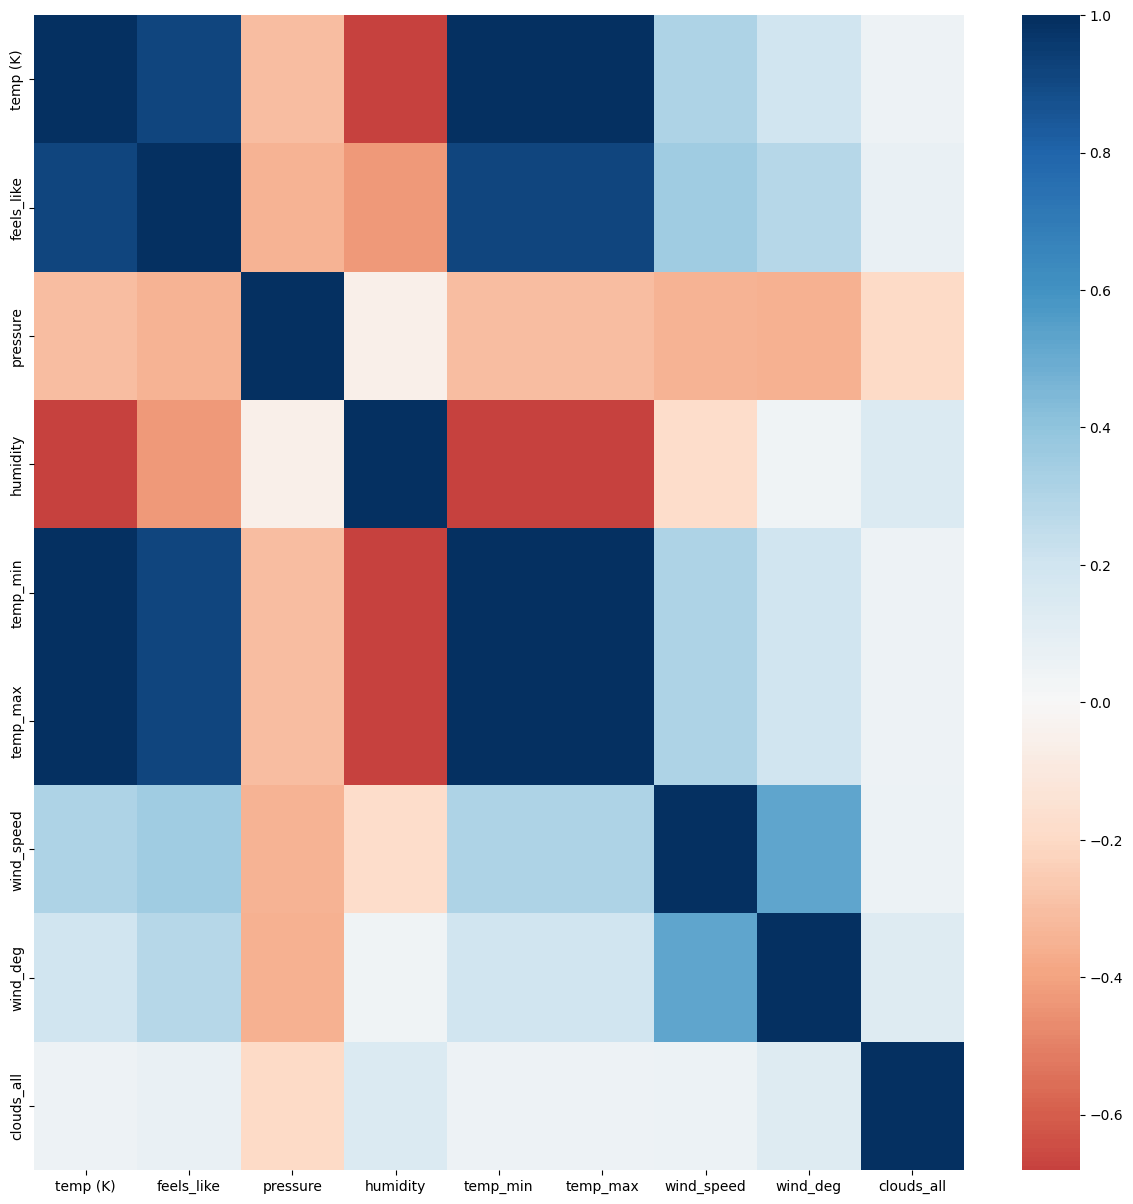

In [18]:
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
df_copy.drop(['datetime', 'id_weather', 'main_weather', 'description_weather', 'icon_weather'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.xticks(rotation=0)


plt.show()

In [ ]:
sns.relplot(df_copy.corr(), cmap='RdBu', center=0,ax=ax)

**Question 01**: How does the correlation between features change in the top 10 countries with the LARGEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is large.

In [9]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
sorted_df =df_copy.sort_values(by="Total Population", ascending=False)
top_10_countries = sorted_df["Country"].head(10)
tmp_df = df_copy[df_copy['Country'].isin(top_10_countries)]
tmp_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
980,218541212.0,108093076.0,110448136.0,35.194972,10.552561,9.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,95.439310,10.306238,65.847735,2022,Nigeria
981,213401323.0,105574311.0,107827012.0,37.117000,13.083000,9.0,12.66120,35.205110,24.634330,13.202700,...,712.608182,60.381415,41.345309,52.285000,53.070000,86.723427,10.306238,65.847735,2021,Nigeria
982,208327405.0,103084231.0,105243174.0,37.467000,12.997000,9.0,12.39887,35.759220,25.116070,13.199060,...,712.608182,82.510000,41.345309,52.456000,53.323000,87.372101,10.306238,65.847735,2020,Nigeria
983,203304492.0,100623653.0,102680839.0,37.849000,12.989000,9.0,12.19518,35.519010,25.539380,12.875340,...,712.608182,80.810000,41.345309,52.651000,53.165000,83.257393,10.306238,65.847735,2019,Nigeria
984,198387623.0,98222504.0,100165119.0,38.248000,13.239000,9.0,12.15275,35.918540,25.896270,12.858500,...,712.608182,81.640000,41.345309,52.331000,52.770000,84.676064,11.810775,65.847735,2018,Nigeria


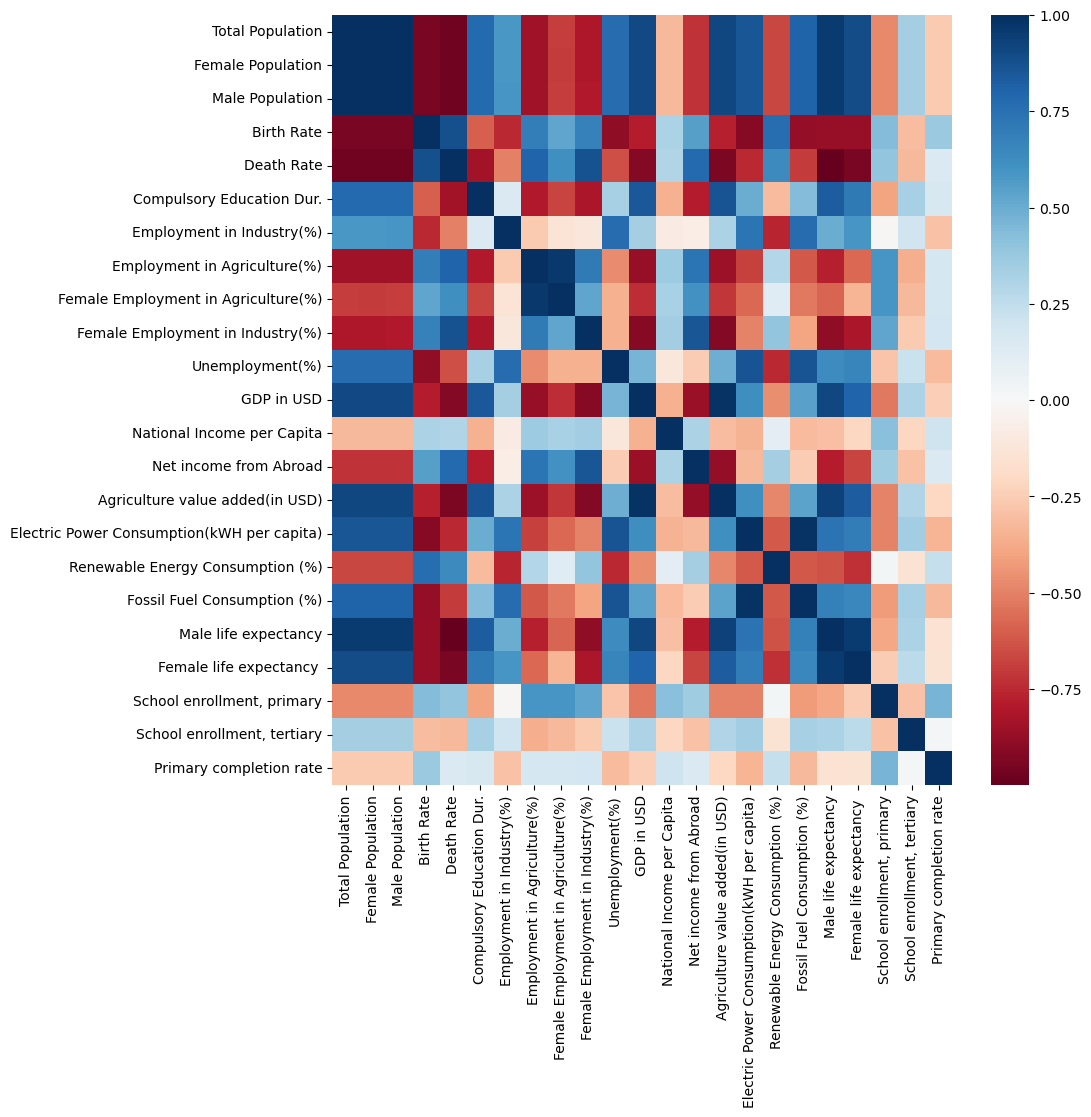

In [10]:
# YOUR CODE HERE
tmp_df.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tmp_df.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**YOUR ANSWER**

In this heatmap we can easily see that the correlation between the variables is quite high, based on the colors. It reveals that there is great variety in variables, such as population, birth and death rates, duration of compulsory schooling, distribution of labor vocations, male and female life expectancy, and living standards. energy consumption, and the rate of renewable energy utilization. This highlights the difference in the social and economic circumstances of nations.

**Question 02**: How does the correlation between features change in the top 10 countries with the SMALLEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is small.

In [13]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
sorted_df =df_copy.sort_values(by="Total Population", ascending=True)
top_10_countries = sorted_df["Country"].head(10)
tmp_df = df_copy[df_copy['Country'].isin(top_10_countries)]
tmp_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
1092,100060.0,47381.0,52679.0,35.194972,10.552561,10.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,97.645370,15.27858,101.047813,2022,Seychelles
1093,99258.0,46959.0,52299.0,16.800000,9.300000,10.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,1.750000,41.345309,71.300000,75.600000,96.514008,15.47105,93.187347,2021,Seychelles
1094,98462.0,46598.0,51864.0,15.800000,6.800000,10.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,1.340000,41.345309,72.700000,82.000000,97.070229,12.69363,97.942642,2020,Seychelles
1095,97625.0,46257.0,51368.0,16.400000,8.100000,10.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,1.210000,41.345309,69.900000,78.400000,96.097908,16.35396,96.484383,2019,Seychelles
1096,96762.0,45934.0,50828.0,17.100000,8.400000,10.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,1.230000,41.345309,68.500000,77.400000,96.983032,14.30938,102.557007,2018,Seychelles


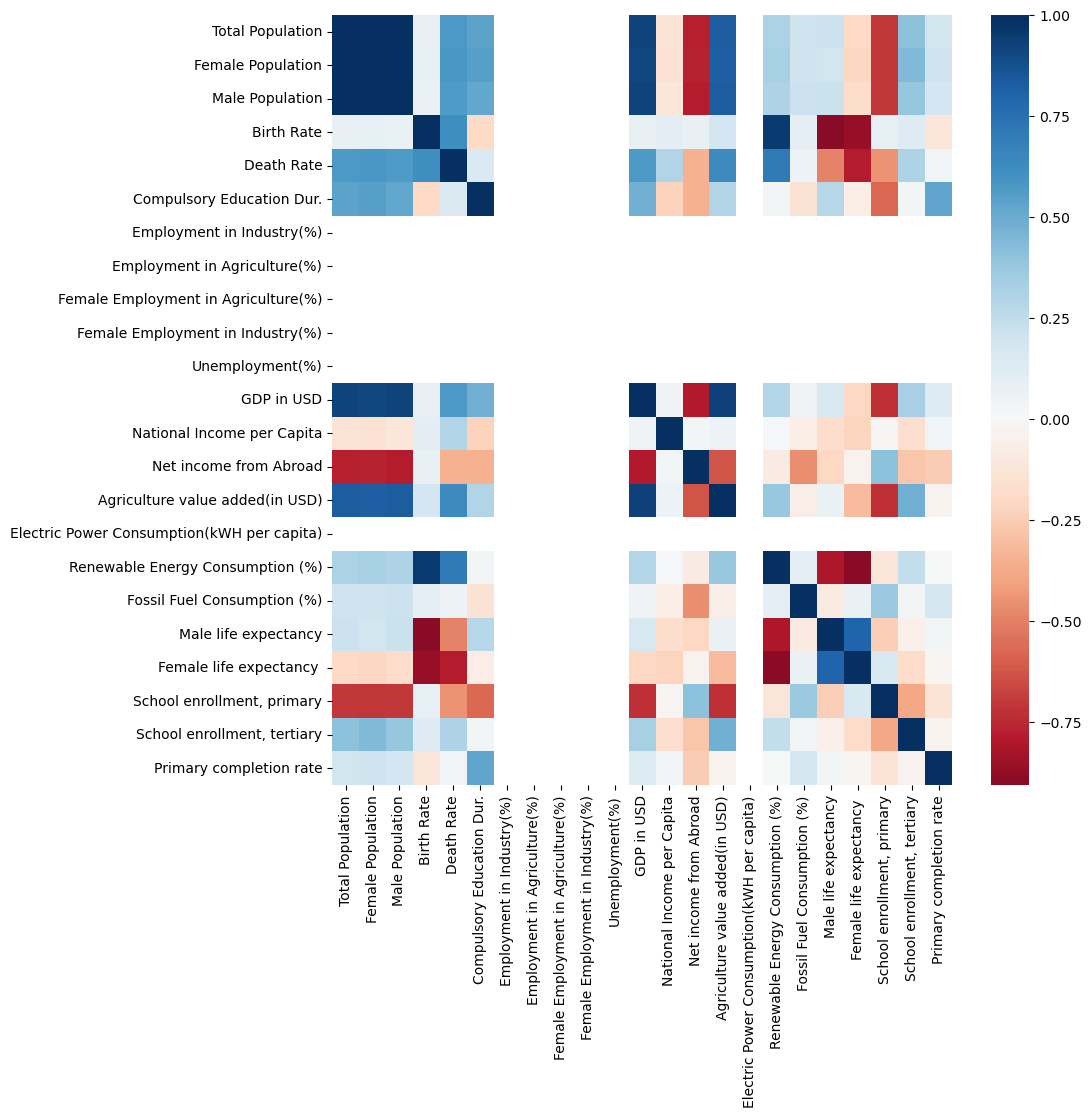

In [14]:
# YOUR CODE HERE
tmp_df.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tmp_df.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**YOUR ANSWER**

In this heat chart, there are still some variables with quite high correlation, but the number of variables with low correlation or even no correlation appears a lot, which shows the complete opposite compared to the top 10 countries. , this illustrates the lack of variety in the social and economic position of 10 LOWEST population nations.

## Making a question? (1.25 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** What is the population situation of the countries on the continent today?

**Answering this question will** help us to see the current population status and predictions about the future development of the labor force of the countries on the continent are under consideration.

**How we answer this question**: we will consider the Average Birth Rate and Death Rate for countries across all the year.

### Pre-processing

In [ ]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

Step 01: construct Average Birth Rate dataframe for each country.

In [15]:
# Create a new dataframe
avg_birthrate_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_birthrate_df["Avg.Birth Rate"] = cleaned_df.groupby("Country")["Birth Rate"].mean()

# Set the index as a column - countries
avg_birthrate_df["Country"] = avg_birthrate_df.index

# Drop the index
avg_birthrate_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_birthrate_df.sort_values("Avg.Birth Rate", inplace=True, ascending=False)

# Display
avg_birthrate_df.head()

,Avg.Birth Rate,Country
35,48.968178,Niger
9,48.202035,Chad
42,47.423535,Somalia
29,45.323213,Mali
1,44.538892,Angola


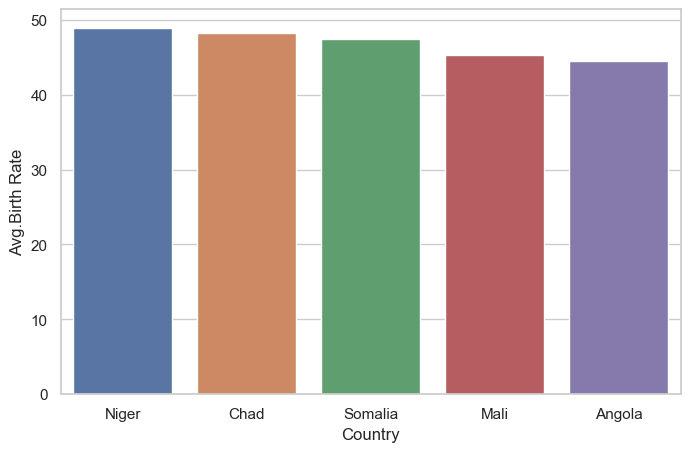

In [16]:
# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_birthrate_df.head(), x="Country", y= "Avg.Birth Rate")

Step 02: construct Average Death Rate dataframe for each country.

In [15]:
# Create a new dataframe
avg_deathrate_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_deathrate_df ["Avg.Death Rate"] = cleaned_df.groupby("Country")["Death Rate"].mean()

# Set the index as a column - countries
avg_deathrate_df["Country"] = avg_deathrate_df .index

# Drop the index
avg_deathrate_df .reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_deathrate_df .sort_values("Avg.Death Rate", inplace=True, ascending=False)

# Display
avg_deathrate_df .head()

,Avg.Death Rate,Country
34,14.026539,Russian Federation
10,11.875182,Georgia
0,9.438110,Afghanistan
28,9.436503,Myanmar
1,9.181610,Armenia


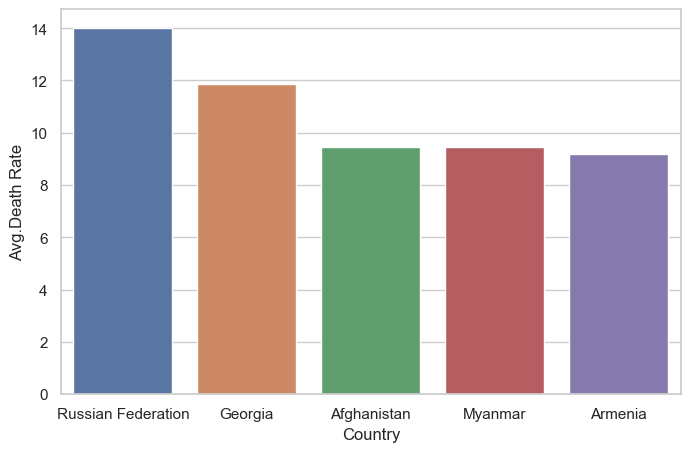

In [16]:
# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_deathrate_df.head(), x="Country", y= "Avg.Death Rate")

**TODO**: Give your obervation here

...

...

## Making your own question 01? (1.5 points)

**Question:** Is there a correlation between renewable energy consumption and fossil fuel consumption in the data?

**Answering this question will:** Investigate whether a relationship exists between renewable energy consumption and fossil fuel consumption.

**How we answer this question:** Calculate the correlation between renewable energy consumption and fossil fuel consumption and visualize this relationship with a heatmap by using seaborn.

**YOUR ANSWER HERE**

As we can see in the heat map below. The correlation value between the two columns Renewable Energy Consumption and Fossil Fuel Consumption has a negative value (approximately -1), which proves that each negative correlation is very strong, meaning that increasing renewable energy consumption will be accompanied by a decrease. fossil fuel consumption, or vice versa.

### Pre-processing

In [ ]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

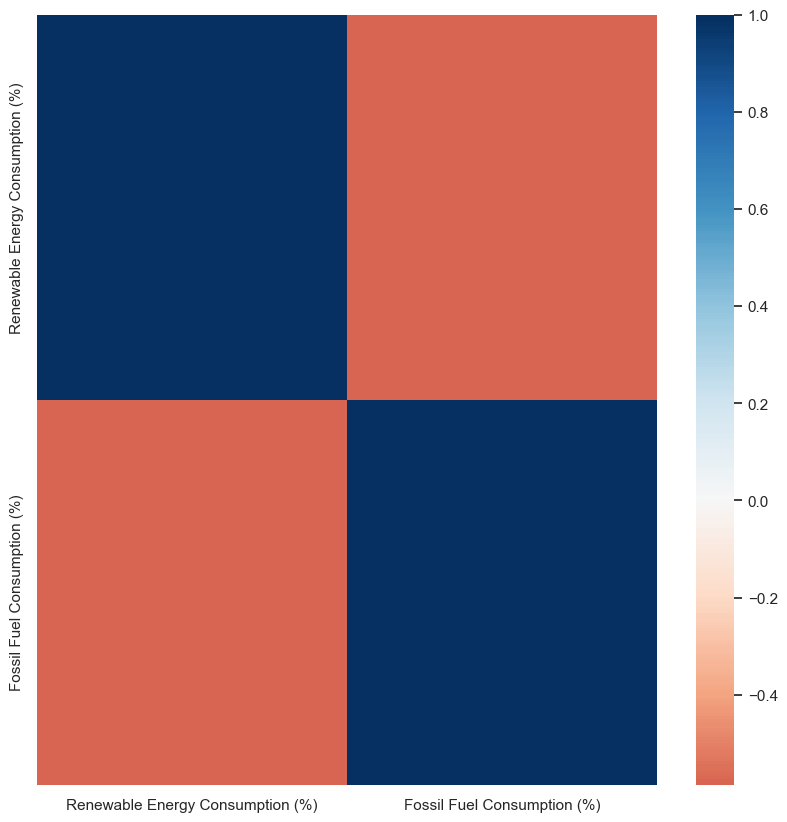

In [17]:
# YOUR CODE HERE
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
selected_columns = df_copy[['Renewable Energy Consumption (%)', 'Fossil Fuel Consumption (%)']]

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(selected_columns.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

## Making your own question 02? (1.5 points)

**Question:** Which countries have the highest and lowest renewable energy consumption, and how does this relate to their fossil fuel consumption and GDP?

**Answering this question will:**  Identify countries leading in renewable energy consumption and assess the potential impact on GDP development.

**How we answer this question:** Determine countries with the highest and lowest renewable energy consumption. Examine the correlation with GDP using bar charts.


**YOUR ANSWER HERE**

We can see that countries that do not use too much renewable energy have higher GDP than countries that use renewable energy at a high rate, this can be easily inferred by inferential statistics because of one course. Fossil fuel is a resource that is quite easy to exploit and use at a cheap price. Unlike countries that do not have fossil fuel resources, they have to find other methods to replace it. Available ways are renewable energy, but this is quite costly and the energy efficiency produced is quite low. These reasons can be inferred that countries with a low rate of using renewable energy fuel sources often have higher GDP than countries that mainly use renewable energy.

### Pre-processing

In [ ]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

Find country that have least renewable energy usage

In [21]:
# YOUR CODE HERE

df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
sorted_df =df_copy.sort_values(by="Renewable Energy Consumption (%)", ascending=True)
least_renewable_energy_usage_country = sorted_df["Country"].head(1)
least_renewable_energy_usage_country_df = df_copy[df_copy['Country'].isin(least_renewable_energy_usage_country)]
least_renewable_energy_usage_country_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,44903225.0,22040988.0,22862237.0,35.194972,10.552561,10.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,108.343933,53.401249,94.711388,2022,Algeria
1,44177969.0,21680725.0,22497244.0,21.524000,4.546000,10.0,31.03555,10.323790,3.929019,23.940450,...,712.608182,60.381415,41.345309,74.879000,77.959000,106.995567,54.209991,99.752678,2021,Algeria
2,43451666.0,21318767.0,22132899.0,22.431000,5.398000,10.0,30.49272,10.524500,3.867479,24.429170,...,712.608182,0.150000,41.345309,73.082000,75.912000,110.330566,53.614029,102.240936,2020,Algeria
3,42705368.0,20948465.0,21756903.0,23.298000,4.392000,10.0,30.46512,9.940742,3.754027,23.812240,...,712.608182,0.160000,41.345309,75.238000,77.760000,107.775131,54.185631,99.729889,2019,Algeria
4,41927007.0,20564404.0,21362603.0,24.074000,4.482000,10.0,30.68305,10.007310,3.807302,24.043400,...,712.608182,0.190000,41.345309,74.966000,77.205000,108.703484,53.163700,102.687988,2018,Algeria


Find country that have most renewable energy usage

In [28]:
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
sorted_df =df_copy.sort_values(by="Renewable Energy Consumption (%)", ascending=False)
most_renewable_energy_usage_country = sorted_df["Country"].head(1)
most_renewable_energy_usage_country_df = df_copy[df_copy['Country'].isin(most_renewable_energy_usage_country)]
most_renewable_energy_usage_country_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
1344,47249585.0,23848253.0,23401332.0,35.194972,10.552561,7.0,13.743740,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,95.43931,10.306238,65.847735,2022,Uganda
1345,45853778.0,23153140.0,22700638.0,36.795000,5.877000,7.0,9.456916,62.916550,68.007900,5.265135,...,712.608182,93.030000,41.345309,60.423000,64.920000,95.43931,10.306238,65.847735,2021,Uganda
1346,44404611.0,22431521.0,21973090.0,37.252000,5.852000,7.0,9.202113,63.477080,68.442480,5.238045,...,712.608182,92.910000,41.345309,60.715000,64.898000,95.43931,10.306238,65.847735,2020,Uganda
1347,42949080.0,21707474.0,21241606.0,37.667000,5.823000,7.0,9.024741,63.510830,69.016050,5.031683,...,712.608182,91.620000,41.345309,60.893000,64.990000,95.43931,10.306238,65.847735,2019,Uganda
1348,41515395.0,20994287.0,20521108.0,38.062000,5.939000,7.0,8.852355,64.280190,69.838300,4.915985,...,712.608182,91.470000,41.345309,60.587000,64.744000,95.43931,10.306238,65.847735,2018,Uganda


Visualization GDP between 2 countries

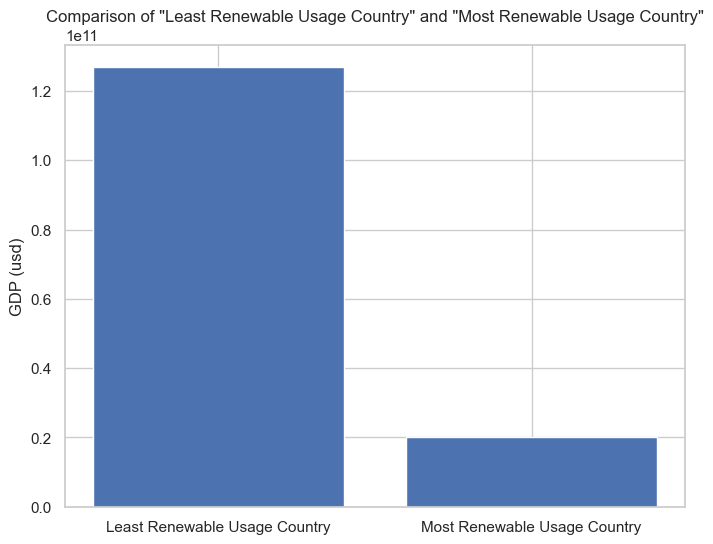

In [27]:
gdp_least_usage_country = least_renewable_energy_usage_country_df['GDP in USD'].mean()
gdp_most_usage_country = most_renewable_energy_usage_country_df['GDP in USD'].mean()

name_cols = ['Least Renewable Usage Country', 'Most Renewable Usage Country']

plt.figure(figsize=(8, 6))
plt.bar(name_cols, [gdp_least_usage_country, gdp_most_usage_country])

plt.ylabel('GDP (usd)')
plt.title('Comparison of "Least Renewable Usage Country" and "Most Renewable Usage Country"')

plt.show()


## Making your own question 03? 

**Question:** Is there a correlation between life expectancy and factors like birth rate, death rate, and GDP?

**Answering this question will:**  Reveal potential relationships between life expectancy and key demographic and economic factors that influence healthcare and overall well-being.

**How we answer this question:** Calculate correlations between life expectancy and birth rate, death rate, and GDP. Visualize these relationships using correlation matrix.

**YOUR ANSWER HERE**

There are a few comments about the heat chart below as follows:
- Birth rate and death rate are two opposite attributes and the way these two attributes affect GDP is also completely opposite. If the birth rate is high, it means the population increases, leading to a decrease in GDP; if the death rate is high, it is the opposite.
- Increased life expectancy also means improved and upgraded health care.
- Increased life expectancy also means GDP growth, because it will extend the working age to a higher level for men, and for women it seems that increasing life expectancy will be slightly inversely correlated with GDP growth, the reason is probably because the retirement age for women is earlier than for men.

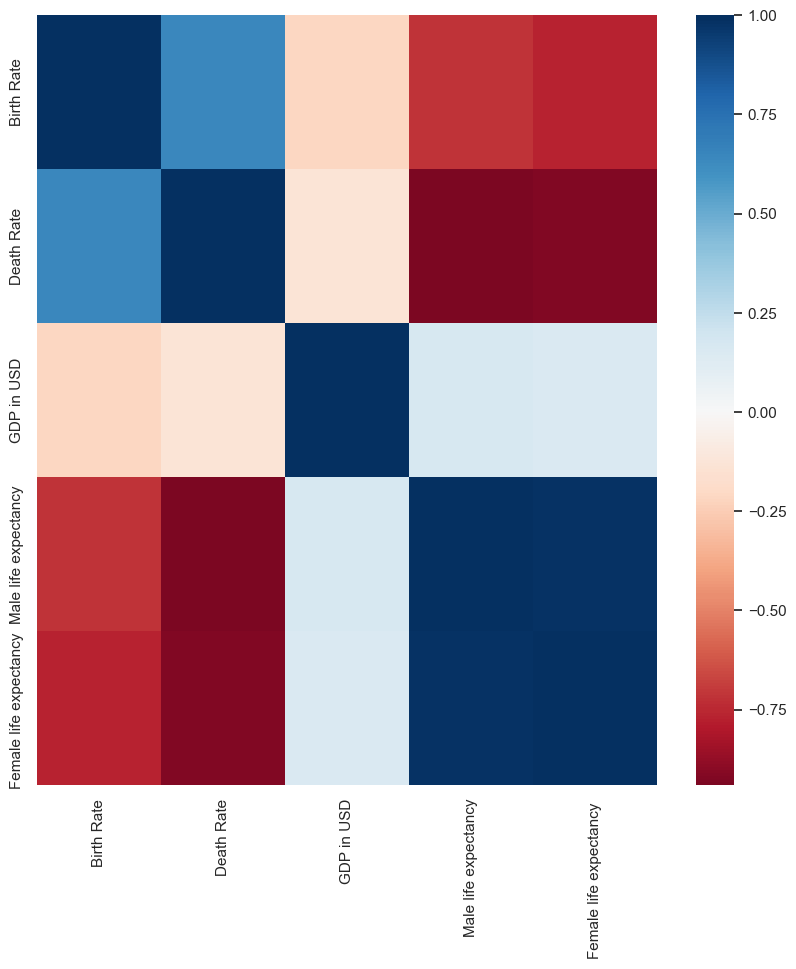

In [31]:
# YOUR CODE HERE
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
selected_columns = df_copy[['Birth Rate', 'Death Rate', 'GDP in USD', 'Male life expectancy', 'Female life expectancy ']]

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(selected_columns.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

## Making your own question 04? 

**Question:** How does primary school enrollment rate correlate with tertiary school enrollment rate, and what does this imply for the education system in various countries?

**Answering this question will:**  Highlight the connection between primary and tertiary education access and suggest potential implications for educational policies.

**How we answer this question:** Calculate the average between primary and tertiary school enrollment rates. Visualize this using bar chart and assess the potential impact on educational policies.

**YOUR ANSWER HERE**

There are a few comments about the heat chart and bar chart below as follows:
- Based on the heat map, we can see that these two attributes have a positive correlation, meaning that if the number of students entering primary school increases, the number entering tertiary education also increases, proving that countries need to try to create conditions as well as Invest more in improving the education system.
- Based on the bar chart, we can see that the proportion of countries with many students are countries with large populations as well as stable GDP (based on the previous questions about GDP), proving that richer countries have a stable GDP. better education than countries with lower GDP

In [7]:
# Create a new dataframe
avg_primary_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_primary_df["Avg.Primary Enrollmemt"] = cleaned_df.groupby("Country")["School enrollment, primary"].mean()

# Set the index as a column - countries
avg_primary_df["Country"] = avg_primary_df.index

# Drop the index
avg_primary_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_primary_df.sort_values("Avg.Primary Enrollmemt", inplace=True, ascending=False)

# Display
avg_primary_df.head()

,Avg.Primary Enrollmemt,Country
28,134.323384,Malawi
27,124.101685,Madagascar
37,123.058705,Rwanda
34,122.451934,Namibia
47,118.728063,Togo


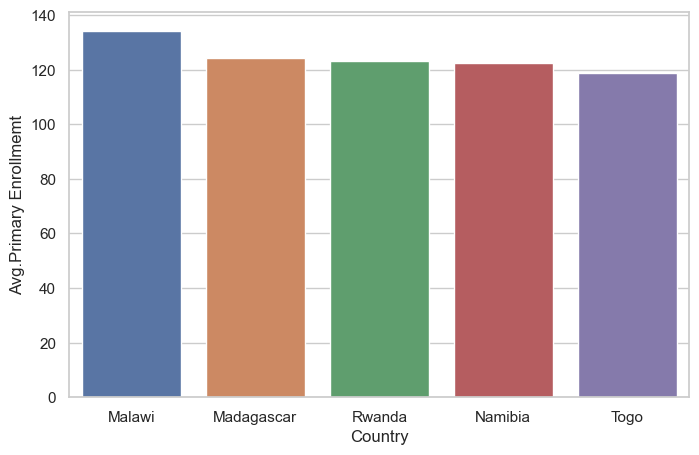

In [10]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_primary_df.head(), x="Country", y= "Avg.Primary Enrollmemt")

In [8]:
# Create a new dataframe
avg_tertiary_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_tertiary_df["Avg.Tertiary Enrollmemt"] = cleaned_df.groupby("Country")["School enrollment, tertiary"].mean()

# Set the index as a column - countries
avg_tertiary_df["Country"] = avg_tertiary_df.index

# Drop the index
avg_tertiary_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_tertiary_df.sort_values("Avg.Tertiary Enrollmemt", inplace=True, ascending=False)

# Display
avg_tertiary_df.head()

,Avg.Tertiary Enrollmemt,Country
0,29.033481,Algeria
48,27.567773,Tunisia
31,27.277143,Mauritius
14,25.388414,"Egypt, Arab Rep."
32,20.008418,Morocco


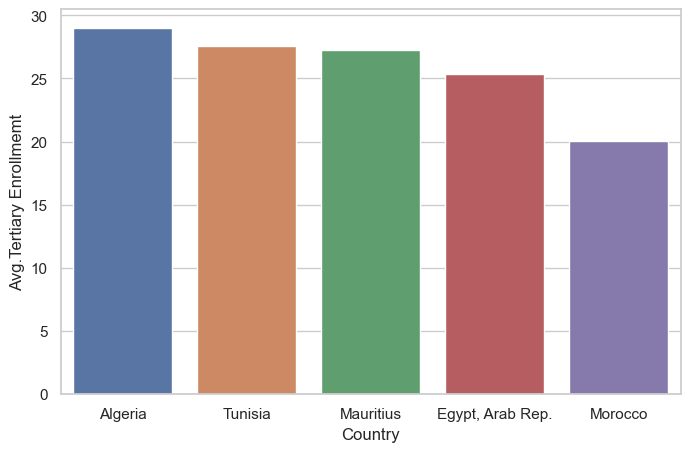

In [11]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_tertiary_df.head(), x="Country", y= "Avg.Tertiary Enrollmemt")

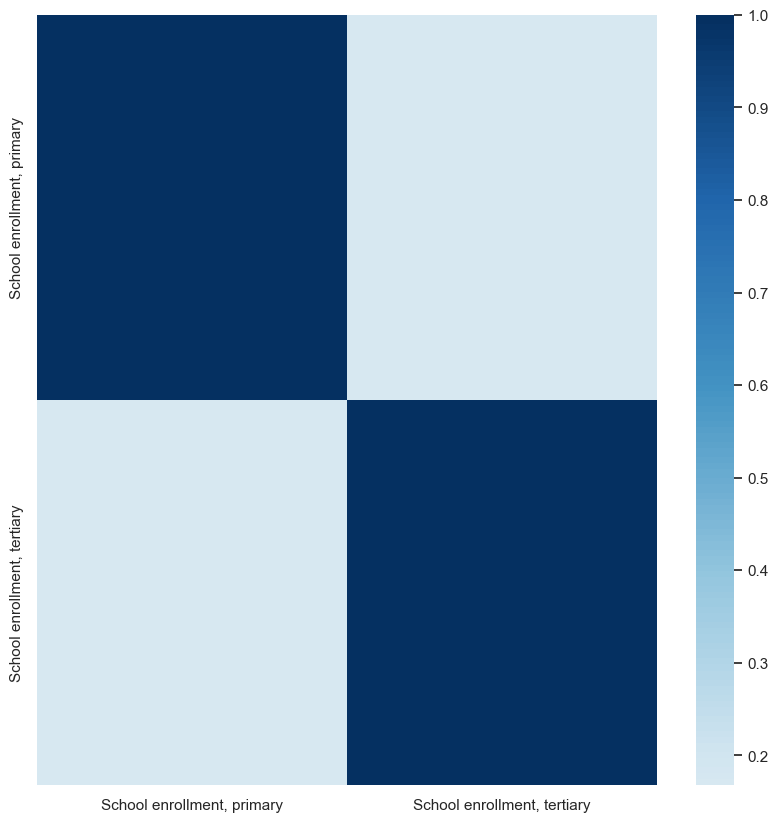

In [20]:
# YOUR CODE HERE
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
selected_columns = df_copy[['School enrollment, primary', 'School enrollment, tertiary']]

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(selected_columns.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

## Making your own question 05? 

**Question:** How does employment in different sectors (industry and agriculture) and what impact does it have on their economic stability?

**Answering this question will:**  Highlight the connection betweenemployment percentages in industry and agriculture access and suggest potential implications for economic stability.

**How we answer this question:** We can explore employment percentages in industry and agriculture, comparing them and examining their influence on economic stability.

**YOUR ANSWER HERE**

We can easily see this through the bar chart that the difference between the GDP of two countries with a high industrial economy compared to a country with a high agricultural economy is really huge, this can also be seen. Inferred from the more developed the world is -> the development and investment in industry is paid more attention, thereby making it possible to earn a lot of money from the industrial economy.

Finding the highest employment in industry country

In [13]:
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
sorted_df =df_copy.sort_values(by="Employment in Industry(%)", ascending=False)
highest_employment_in_industry_country = sorted_df["Country"].head(1)
highest_employment_in_industry_country_df = df_copy[df_copy['Country'].isin(highest_employment_in_industry_country)]
highest_employment_in_industry_country_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
868,1262523.0,639990.0,622533.0,35.194972,10.552561,11.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,95.439310,44.386631,65.847735,2022,Mauritius
869,1266334.0,641465.0,624869.0,10.300000,10.500000,11.0,23.63138,5.147591,3.116017,14.637680,...,712.608182,60.381415,41.345309,70.290000,77.240000,102.881149,43.959080,98.818207,2021,Mauritius
870,1266014.0,640853.0,625161.0,10.600000,8.700000,11.0,23.40438,5.317968,3.223432,14.826070,...,712.608182,9.410000,41.345309,70.860000,77.660000,97.968536,42.784149,95.860382,2020,Mauritius
871,1265985.0,640430.0,625555.0,10.200000,8.800000,11.0,23.93831,5.584274,3.784408,14.413370,...,712.608182,8.940000,41.345309,71.070000,77.560000,98.709282,42.664070,97.630478,2019,Mauritius
872,1265577.0,639874.0,625703.0,10.200000,8.500000,11.0,24.10495,6.203211,4.081818,15.677440,...,712.608182,9.190000,41.345309,71.270000,77.720000,99.777390,40.531071,98.322701,2018,Mauritius


Finding the highest employment in agriculture country

In [14]:
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
sorted_df =df_copy.sort_values(by="Employment in Agriculture(%)", ascending=False)
highest_employment_in_agriculture_country = sorted_df["Country"].head(1)
highest_employment_in_agriculture_country_df = df_copy[df_copy['Country'].isin(highest_employment_in_agriculture_country)]
highest_employment_in_agriculture_country_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
140,12889576.0,6488650.0,6400926.0,35.194972,10.552561,8.224186,13.743740,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,103.900749,6.516800,47.148548,2022,Burundi
141,12551213.0,6319427.0,6231786.0,34.842000,7.474000,8.224186,3.619404,85.850300,93.650790,0.994591,...,712.608182,83.250000,41.345309,59.711000,63.609000,100.606888,6.286772,49.047241,2021,Burundi
142,12220227.0,6153628.0,6066599.0,35.603000,7.562000,8.224186,3.492677,86.094780,93.761570,0.976662,...,712.608182,83.520000,41.345309,59.465000,63.675000,105.158096,10.306238,49.195919,2020,Burundi
143,11874838.0,5980560.0,5894278.0,36.323000,7.352000,8.224186,3.452964,86.061500,93.781660,0.948326,...,712.608182,84.840000,41.345309,60.339000,64.347000,104.938019,10.306238,53.330379,2019,Burundi
144,11493472.0,5789861.0,5703611.0,37.011000,7.648000,8.224186,3.463570,86.176980,93.840570,0.935388,...,712.608182,85.650000,41.345309,59.821000,63.524000,107.725220,4.698550,57.223091,2018,Burundi


Visualization GDP between 2 countries

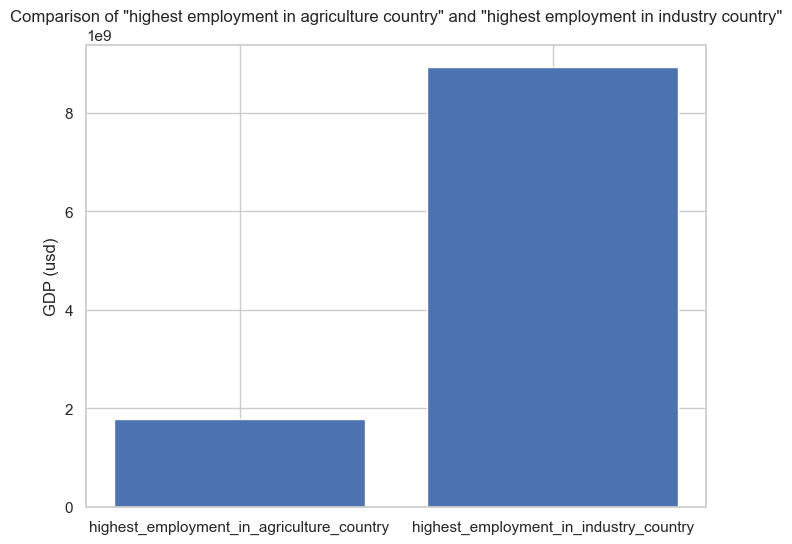

In [18]:
agriculture = highest_employment_in_agriculture_country_df['GDP in USD'].mean()
industry = highest_employment_in_industry_country_df['GDP in USD'].mean()

name_cols = ['highest_employment_in_agriculture_country', 'highest_employment_in_industry_country']

plt.figure(figsize=(8, 6))
plt.bar(name_cols, [agriculture, industry])

plt.ylabel('GDP (usd)')
plt.title('Comparison of "highest employment in agriculture country" and "highest employment in industry country"')

plt.show()

## Making your own question 06? 

**Question:** What is the current state of primary and tertiary school enrollment in various countries, and does it correlate with GDP and literacy rates?

**Answering this question will:** Provide insights into the educational landscape and its relationships with economic and literacy factors.

**How we answer this question:** We can analyze primary and tertiary school enrollment rates and their correlation with GDP and literacy rates.

**YOUR ANSWER HERE**

As we can see in this heat map, the correlation between the 3 attributes is a positive correlation, which means that the more students there are -> the knowledge base will improve significantly, thereby creating creating a source of high-quality intellectual labor -> GDP growth

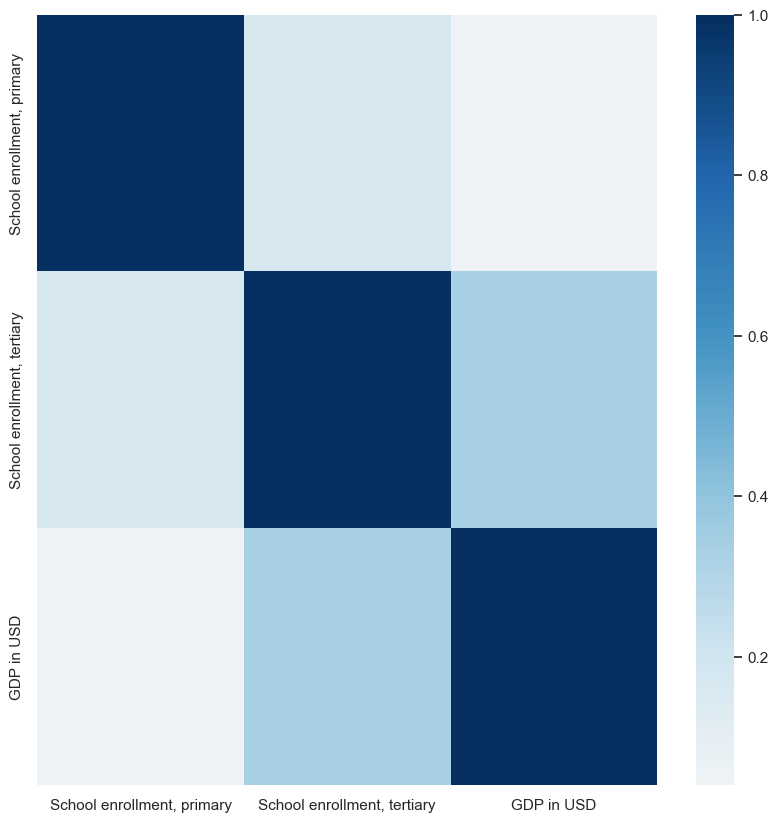

In [22]:
# YOUR CODE HERE
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
selected_columns = df_copy[['School enrollment, primary', 'School enrollment, tertiary','GDP in USD']]

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(selected_columns.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()